In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('fortune500.csv')

pandas用于数据处理，matplotlib用于绘图，seaborn使绘图更美观。第一行不是python命令，而被称为line magic。%表示作用与一行，%%表示作用于全文。此处%matplotlib inline 表示使用matlib画图，并将图片输出。
随后，加载数据集。

In [45]:
df = pd.read_csv('fortune500.csv')

In [46]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [47]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


对数据属性列进行重命名，以便在后续访问

In [48]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

接下来，检查数据条目是否加载完整。

In [49]:
len(df)

25500

从1955至2055年总共有25500条目录。然后，检查属性列的类型。

In [50]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

其他属性列都正常，但是对于profit属性，期望的结果是float类型，因此其可能包含非数字的值，利用正则表达式进行检查。

In [51]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


确实存在这样的记录，profit这一列为字符串，统计一下到底存在多少条这样的记录。

In [52]:
len(df.profit[non_numberic_profits])

369

总体来说，利润（profit）列包含非数字的记录相对来说较少。更进一步，使用直方图显示一下按照年份的分布情况。

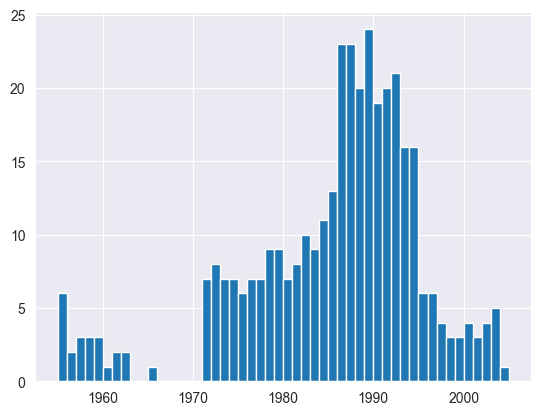

In [53]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

可见，单独年份这样的记录数都少于25条，即少于4%的比例。这在可以接受的范围内，因此删除这些记录。

In [54]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

再次检查数据记录的条目数。

In [55]:
len(df)

25131

In [56]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

可见，上述操作已经达到清洗无效数据记录的效果。

接下来，使用matplotlib进行绘图
以年分组绘制平均利润和收入。首先定义变量和方法。

In [57]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

现在开始绘图

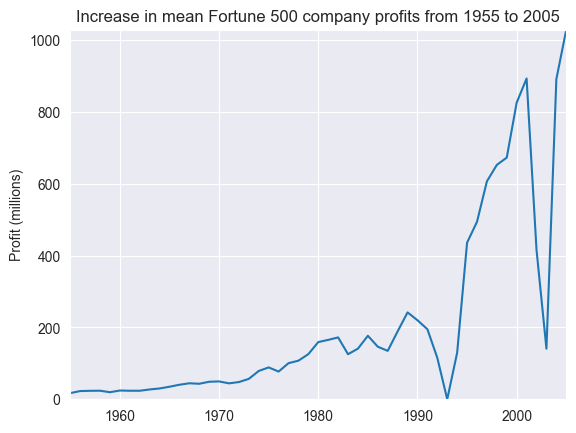

In [58]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

看起来像指数增长，但是1990年代初期出现急剧的下滑，对应当时经济衰退和网络泡沫。再来看看收入曲线。

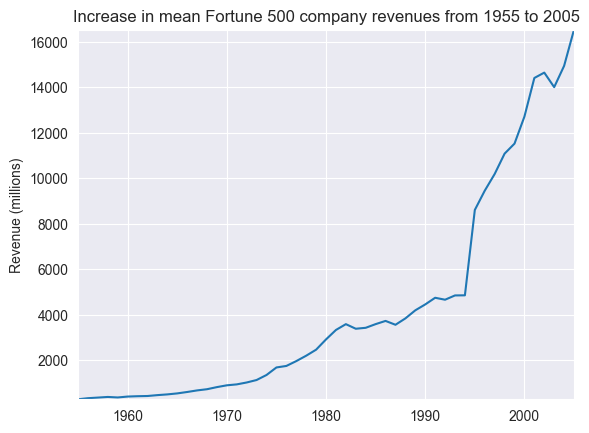

In [59]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

公司收入曲线并没有出现急剧下降，可能是由于财务会计的处理。对数据结果进行标准差处理。

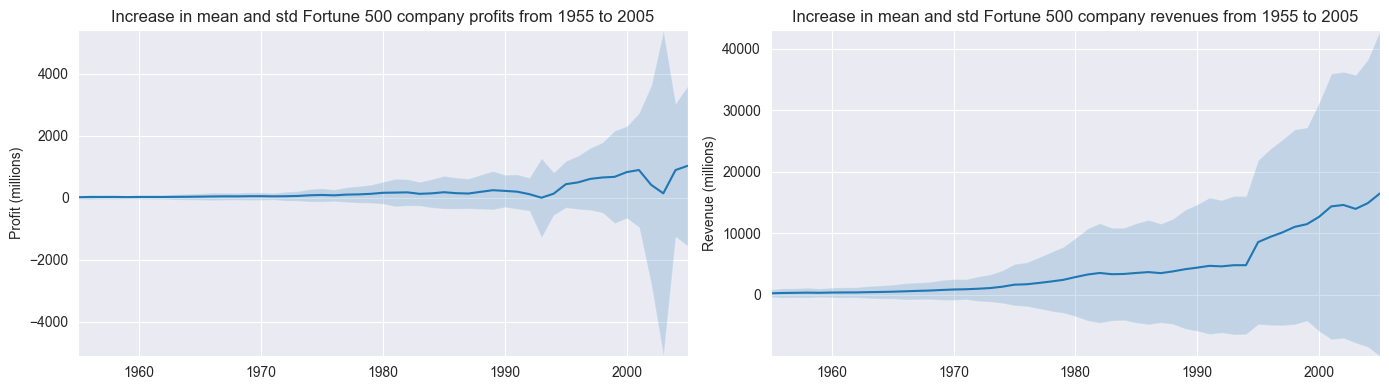

In [60]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

可见，不同公司之间的收入和利润差距惊人，那么到底前10%和后10%的公司谁的波动更大了？此外，还有很多有价值的信息值得进一步挖掘。